In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

In [4]:
df = sns.load_dataset('tips')

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.groupby(['sex', 'smoker'])['total_bill'].mean().unstack()

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [7]:
df.pivot_table(index='sex', columns='smoker', values = 'total_bill')

smoker,Yes,No
sex,,
Male,22.284500,19.791237
Female,17.977879,18.105185


In [8]:
df.pivot_table(index='sex', columns='smoker', values = 'total_bill', aggfunc='sum')

smoker,Yes,No
sex,,
Male,1337.07,1919.75
Female,593.27,977.68


In [9]:
df.pivot_table(index = 'sex', columns = 'smoker')

size                 tip           total_bill           
smoker       Yes        No       Yes        No        Yes         No
sex                                                                 
Male    2.500000  2.711340  3.051167  3.113402  22.284500  19.791237
Female  2.242424  2.592593  2.931515  2.773519  17.977879  18.105185

## pivot table, being multidimensional


In [10]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [11]:
df.pivot_table(index = ['sex', 'smoker'], columns = ['time', 'day'], aggfunc={'size': 'mean', 'tip':'mean', 'total_bill':'sum'})

size                                                 tip  \
time              Lunch           Dinner                              Lunch   
day                Thur       Fri   Thur  Fri       Sat       Sun      Thur   
sex    smoker                                                                 
Male   Yes     2.300000  1.666667    NaN  2.4  2.629630  2.600000  3.058000   
       No      2.500000       NaN    NaN  2.0  2.656250  2.883721  2.941500   
Female Yes     2.428571  2.000000    NaN  2.0  2.200000  2.500000  2.990000   
       No      2.500000  3.000000    2.0  2.0  2.307692  3.071429  2.437083   

                                                      total_bill              \
time                Dinner                                 Lunch               
day             Fri   Thur    Fri       Sat       Sun       Thur    Fri  Sat   
sex    smoker                                                                  
Male   Yes     1.90    NaN  3.246  2.879259  3.521333     191.71  34.16  0.0   
       No       NaN    NaN  2.500  3.256563  3.115349     369.73   0.00  0.0   
Female Yes     2.66    NaN  2.700  2.868667  3.500000     134.53  39.78  0.0   
       No      3.00    3.0  3.250  2.724615  3.329286     381.58  15.98  0.0   

                                                   
time               Dinner                          
day            Sun   Thur     Fri     Sat     Sun  
sex    smoker                                      
Male   Yes     0.0   0.00  129.46  589.62  392.12  
       No      0.0   0.00   34.95  637.73  877.34  
Female Yes     0.0   0.00   48.80  304.00   66.16  
       No      0.0  18.78   22.75  247.05  291.54

In [12]:
# margins  - gives a colums which gives all
df.pivot_table(index='sex', columns='smoker', values = 'total_bill', aggfunc='sum', margins=True)

smoker,Yes,No,All
sex,,,
Male,1337.07,1919.75,3256.82
Female,593.27,977.68,1570.95
All,1930.34,2897.43,4827.77


In [13]:
# plotting graphs
exp = pd.read_csv('/Users/ishaqbasha/Machine_Learning/Campus_X/campusxdatascience/Pandas/Pandas_DataSets/Session_22/expense_data.csv')

In [14]:
exp.sample(5)

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1
19,2/24/2022 19:15,CUB - online payment,Food,NaN,Tamen,324.7,Expense,NaN,324.7,INR,324.7
47,2/10/2022 20:15,CUB - online payment,Food,NaN,Kfc dinner,641.0,Expense,NaN,641.0,INR,641.0
112,1/13/2022 20:46,CUB - online payment,Food,NaN,Dinner,66.0,Expense,NaN,66.0,INR,66.0
150,1/2/2022 14:16,CUB - online payment,Transportation,NaN,Train to vnr,725.0,Expense,NaN,725.0,INR,725.0
100,1/18/2022 12:59,CUB - online payment,Other,NaN,To kumara,200.0,Expense,NaN,200.0,INR,200.0


In [15]:
exp['Category'].value_counts()

Food                156
Other                60
Transportation       31
Apparel               7
Household             6
Allowance             6
Social Life           5
Education             1
Salary                1
Self-development      1
Beauty                1
Gift                  1
Petty cash            1
Name: Category, dtype: int64

In [16]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            277 non-null    object 
 1   Account         277 non-null    object 
 2   Category        277 non-null    object 
 3   Subcategory     0 non-null      float64
 4   Note            273 non-null    object 
 5   INR             277 non-null    float64
 6   Income/Expense  277 non-null    object 
 7   Note.1          0 non-null      float64
 8   Amount          277 non-null    float64
 9   Currency        277 non-null    object 
 10  Account.1       277 non-null    float64
dtypes: float64(5), object(6)
memory usage: 23.9+ KB


In [17]:
exp['Date'] = pd.to_datetime(exp['Date'])

In [18]:
exp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 277 entries, 0 to 276
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Date            277 non-null    datetime64[ns]
 1   Account         277 non-null    object        
 2   Category        277 non-null    object        
 3   Subcategory     0 non-null      float64       
 4   Note            273 non-null    object        
 5   INR             277 non-null    float64       
 6   Income/Expense  277 non-null    object        
 7   Note.1          0 non-null      float64       
 8   Amount          277 non-null    float64       
 9   Currency        277 non-null    object        
 10  Account.1       277 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(5)
memory usage: 23.9+ KB


In [22]:
exp['month']= exp['Date'].dt.month_name()

In [23]:
exp.head()

,Date,Account,Category,Subcategory,Note,INR,Income/Expense,Note.1,Amount,Currency,Account.1,month
0,2022-03-02 10:11:00,CUB - online payment,Food,NaN,Brownie,50.0,Expense,NaN,50.0,INR,50.0,March
1,2022-03-02 10:11:00,CUB - online payment,Other,NaN,To lended people,300.0,Expense,NaN,300.0,INR,300.0,March
2,2022-03-01 19:50:00,CUB - online payment,Food,NaN,Dinner,78.0,Expense,NaN,78.0,INR,78.0,March
3,2022-03-01 18:56:00,CUB - online payment,Transportation,NaN,Metro,30.0,Expense,NaN,30.0,INR,30.0,March
4,2022-03-01 18:22:00,CUB - online payment,Food,NaN,Snacks,67.0,Expense,NaN,67.0,INR,67.0,March


In [25]:
exp.pivot_table(index='month', columns = 'Category', values = 'INR', aggfunc='sum')

Category,Allowance,Apparel,Beauty,Education,Food,Gift,Household,Other,Petty cash,Salary,Self-development,Social Life,Transportation
month,,,,,,,,,,,,,
December,11000.0,2590.0,196.0,NaN,6440.72,NaN,4800.0,1790.0,NaN,NaN,400.0,513.72,914.0
February,NaN,798.0,NaN,NaN,5579.85,NaN,2808.0,20000.0,NaN,NaN,NaN,1800.00,5078.8
January,1000.0,NaN,NaN,1400.0,9112.51,NaN,4580.0,13178.0,NaN,8000.0,NaN,200.00,2850.0
March,NaN,NaN,NaN,NaN,195.00,NaN,NaN,900.0,NaN,NaN,NaN,NaN,30.0
November,2000.0,NaN,NaN,NaN,3174.40,115.0,NaN,2000.0,3.0,NaN,NaN,NaN,331.0


<AxesSubplot:xlabel='month'>

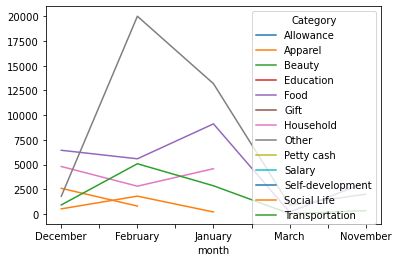

In [26]:
exp.pivot_table(index='month', columns = 'Category', values = 'INR', aggfunc='sum').plot()

In [ ]:
exp.pivot_table(index='month', columns = 'Income/E', values = 'INR', aggfunc='sum').plot()